## 04-03 Optimizer

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

### 1.优化器方法

step方法

In [15]:
w = torch.rand((2, 2), requires_grad=True)
w.grad = torch.ones((2, 2))
optimizer = optim.SGD([w], lr=0.1)

print('Before Step:', w.data)
optimizer.step()
print('After Step:', w.data)
print('ID Optimizer:', id(optimizer.param_groups[0]['params'][0]))
print('ID Weight:', id(w))

Before Step: tensor([[0.8234, 0.9262],
        [0.0343, 0.9262]])
After Step: tensor([[ 0.7234,  0.8262],
        [-0.0657,  0.8262]])
ID Optimizer: 139856005929232
ID Weight: 139856005929232


zero_grad方法

In [12]:
w = torch.rand((2, 2), requires_grad=True)
w.grad = torch.ones((2, 2))
optimizer = optim.SGD([w], lr=0.1)

optimizer.step()
print('Before ZeroGrad:', w.grad)
optimizer.zero_grad()
print('After ZeroGrad:', w.grad)

Before ZeroGrad: tensor([[1., 1.],
        [1., 1.]])
After ZeroGrad: tensor([[0., 0.],
        [0., 0.]])


add_param_group方法

In [16]:
w1 = torch.rand((2, 2), requires_grad=True)
w1.grad = torch.ones((2, 2))
optimizer = optim.SGD([w1], lr=0.1)
print('optimizer.param_group:', optimizer.param_groups)
w2 = torch.randn((3, 3), requires_grad=True)
optimizer.add_param_group({'params': w2, 'lr': 1e-4})
print('optimizer.param_group:', optimizer.param_groups)

optimizer.param_group: [{'params': [tensor([[0.8768, 0.5316],
        [0.7635, 0.8426]], requires_grad=True)], 'lr': 0.1, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}]
optimizer.param_group: [{'params': [tensor([[0.8768, 0.5316],
        [0.7635, 0.8426]], requires_grad=True)], 'lr': 0.1, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}, {'params': [tensor([[ 0.8998, -0.3191, -0.7163],
        [-0.4531, -1.1263, -1.6333],
        [ 1.0614, -0.8988,  0.1772]], requires_grad=True)], 'lr': 0.0001, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}]


state_dict方法

In [20]:
w = torch.rand((2, 2), requires_grad=True)
w.grad = torch.ones((2, 2))
optimizer = optim.SGD([w], lr=0.1, momentum=0.9)
print('Before Step:', optimizer.state_dict())

for i in range(10):
    optimizer.step()

print('After Step:', optimizer.state_dict())
torch.save(optimizer.state_dict(), './temp/optimizer_state_dict.pkl')

Before Step: {'state': {}, 'param_groups': [{'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [139856021980976]}]}
After Step: {'state': {139856021980976: {'momentum_buffer': tensor([[6.5132, 6.5132],
        [6.5132, 6.5132]])}}, 'param_groups': [{'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [139856021980976]}]}


load state_dict

In [22]:
w = torch.rand((2, 2), requires_grad=True)
w.grad = torch.ones((2, 2))
optimizer = optim.SGD([w], lr=0.1, momentum=0.9)

print('Before Load State Dict:', optimizer.state_dict())
state_dict = torch.load('./temp/optimizer_state_dict.pkl')
optimizer.load_state_dict(state_dict)
print('After Load State Dict:', optimizer.state_dict

Before Load State Dict: {'state': {}, 'param_groups': [{'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [139856026929424]}]}
After Load State Dict: {'state': {139856026929424: {'momentum_buffer': tensor([[6.5132, 6.5132],
        [6.5132, 6.5132]])}}, 'param_groups': [{'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [139856026929424]}]}


### 2.梯度下降中的学习率

In [25]:
def func(x):
    '''函数y=4*x^2'''
    return 4 * torch.pow(x, 2)

x = torch.tensor([2.], requires_grad=True)

绘制数据

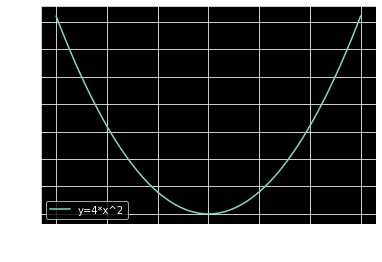

In [28]:
xs = torch.linspace(-3, 3, 100)
ys = func(xs)
plt.plot(xs.numpy(), ys.numpy(), label='y=4*x^2')
plt.grid()
plt.xlabel('x')
plt.ylabe('y')
plt.legend()
plt.show()

梯度下降

Iter:0, x:     2.0, x.grad:    16.0, loss:      16.0
Iter:1, x:1.6800000667572021, x.grad:13.440000534057617, loss:11.28960132598877
Iter:2, x:1.4112000465393066, x.grad:11.289600372314453, loss:7.9659423828125
Iter:3, x:1.1854079961776733, x.grad:9.483263969421387, loss:5.6207685470581055
Iter:4, x:0.9957427382469177, x.grad:7.965941905975342, loss:3.9660143852233887
Iter:5, x:0.8364238739013672, x.grad:6.6913909912109375, loss:2.79841947555542
Iter:6, x:0.7025960683822632, x.grad:5.6207685470581055, loss:1.9745649099349976
Iter:7, x:0.5901806950569153, x.grad:4.721445560455322, loss:1.393252968788147
Iter:8, x:0.4957517981529236, x.grad:3.9660143852233887, loss:0.9830793738365173
Iter:9, x:0.4164315164089203, x.grad:3.3314521312713623, loss:0.6936608552932739
Iter:10, x:0.3498024642467499, x.grad:2.798419713973999, loss:0.48944705724716187
Iter:11, x:0.29383406043052673, x.grad:2.350672483444214, loss:0.3453538119792938
Iter:12, x:0.2468206137418747, x.grad:1.9745649099349976, loss:0

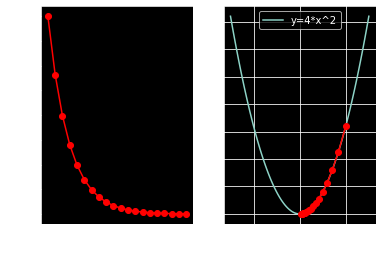

In [36]:
iter_rec, loss_rec, x_rec = list(), list(), list()

lr = 0.02
max_iter = 20

x = torch.tensor([2.], requires_grad=True)
for i in range(max_iter):
    y = func(x)
    y.backward()

    print('Iter:{}, x:{:8}, x.grad:{:8}, loss:{:10}'.format(
        i, x.detach().numpy()[0], x.grad.detach().numpy()[0], y.item()))
    x_rec.append(x.item())
    x.data.sub_(lr * x.grad)
    x.grad.zero_()

    iter_rec.append(i)
    loss_rec.append(y.item())

plt.subplot(121).plot(iter_rec, loss_rec, '-ro')
plt.xlabel('Iteration')
plt.ylabel('Loss')

xs = torch.linspace(-3, 3, 100)
ys = func(xs)
plt.subplot(122).plot(xs.numpy(), ys.numpy(), label='y=4*x^2')
plt.grid()
y_rec = [func(torch.tensor(i)).item() for i in x_rec]
plt.subplot(122).plot(x_rec, y_rec, '-ro')
plt.legend()
plt.show()

多学习率实验

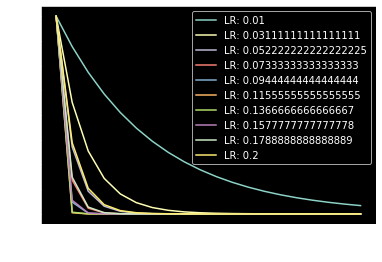

In [40]:
lr_list = np.linspace(0.01, 0.2, num=10).tolist()
loss_rec = [[] for l in range(len(lr_list))]
iter_rec = list()

for i, lr in enumerate(lr_list):
    x = torch.tensor([2.], requires_grad=True)
    for iter in range(20):
        y = func(x)
        y.backward()
        x.data.sub_(lr * x.grad)
        x.grad.zero_()
        loss_rec[i].append(y.item())

for i, loss_r in enumerate(loss_rec):
    plt.plot(range(len(loss_r)), loss_r, label='LR: {}'.format(lr_list[i]))
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### 3.梯度下降中的动量

In [41]:
def exp_w_func(beta, time_list):
    return [(1 - beta) * np.power(beta, exp) for exp in time_list]

指数加权平均

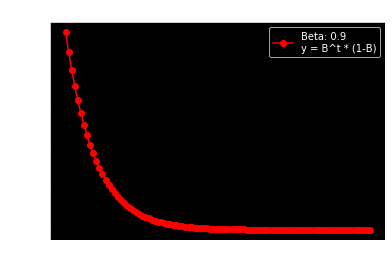

In [42]:
beta = 0.9
time_list = np.arange(100).tolist()
weights = exp_w_func(beta, time_list)

plt.plot(time_list, weights, '-ro', label='Beta: {}\ny = B^t * (1-B)'.format(beta))
plt.xlabel('time')
plt.ylabel('weight')
plt.legend()
plt.title('Exponentially Weighted Average')
plt.show()

不同beta值的比较

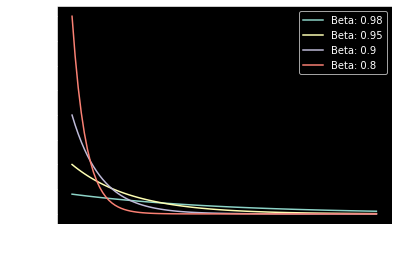

In [43]:
beta_list = [0.98, 0.95, 0.9, 0.8]
w_list = [exp_w_func(beta, time_list) for beta in beta_list]
for i, w in enumerate(w_list):
    plt.plot(time_list, w, label = 'Beta: {}'.format(beta_list[i]))
    plt.xlabel('time')
    plt.ylabel('weight')
plt.legend()
plt.show()

SGD中的动量

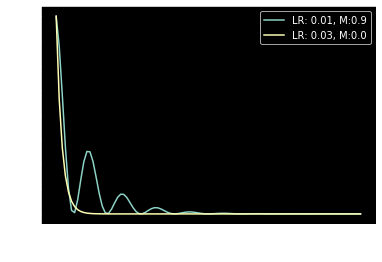

In [44]:
def func(x):
    return 4 * torch.pow(x, 2)

lr_list = [0.01, 0.03]
loss_rec = [[] for l in range(len(lr_list))]
iter_rec = list()
momentum_list = list()

for i, lr in enumerate(lr_list):
    x = torch.tensor([2.], requires_grad=True)

    momentum = 0. if lr == 0.03 else 0.9
    momentum_list.append(momentum)
    optimizer = optim.SGD([x], lr=lr, momentum=momentum)

    for iter in range(100):
        y = func(x)
        y.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_rec[i].append(y.item())

for i, loss_r in enumerate(loss_rec):
    plt.plot(range(len(loss_r)), loss_r, label='LR: {}, M:{}'.format(lr_list[i], momentum_list[i]))
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()